In [8]:
# Naive Bayes Algorithm
# 데이터를 Naive(단순)하게 '독립'적인 사건으로 가정하고
# 이 독립된 사건들을 'Bayes' 이론에 대입시켜 가장 높은 확률의 레이블로 분류하는 알고리즘
# 조건부 확률을 응용한 베이즈 공식을 사용함 -> 공통 분모를 제거하여 연산 속도 이득

# 이산적인 데이터
# - 다항 분포 나이브 베이즈 : 데이터의 특징이 출현 횟수로 나타날 때 ex) 영화 감상평 토대로 긍정/부정 리뷰 분류
# - 베르누이 나이브 베이즈 : 데이터의 특징이 0, 1로 나타날 때 ex) 스팸 메일 분류

# 이산적이지 않은 데이터
# - 가우시안 나이브 베이즈 : 연속적인 성질이 있는 특징이 있는 데이터 분류 ex) 붓꽃 데이터셋 분류

import pandas as pd
# iris 데이터셋이 sklearn 에 내장되어있음
from sklearn.datasets import load_iris
# train_set_split 을 활용하여 데이터 나눔
from sklearn.model_selection import train_test_split
# Gaussian Naive Bayes 로 iris 데이터를 분류
from sklearn.naive_bayes import GaussianNB
# 분류 성능을 측정하기 위해 metrics와 accuracy_score 임포트
from sklearn import metrics
from sklearn.metrics import accuracy_score

# iris 데이터 불러옴
dataset = load_iris()
# pandas 데이터 프레임으로 저장
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
# 분류값을 데이터 프레임에 저장
df['target'] = dataset.target
# 숫자인 분류값을 이해를 돕기위해 문자로 변경
# 붓꽃의 종류 3가지 (setosa, versicolor, virginica)
df.target = df.target.map({
    0: "setosa",
    1: "versicolor",
    2: "virginica"
})

# sepal length : 꽃받침 길이
# sepal width : 꽃받침 너비
# petal length : 꽃잎 길이
# petal width : 꽃잎 너비
# target : 붓꽃 종류
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
# 분류값 별 데이터 분포 (개수)
df.target.value_counts()

setosa        50
virginica     50
versicolor    50
Name: target, dtype: int64

In [10]:
# Iris 데이터의 분포도 확인

# 분류값 별로 데이터 프레임을 나눔
setosa_df = df[df.target == 'setosa']
versicolor_df = df[df.target == 'versicolor']
virginica_df = df[df.target == 'virginica']

<AxesSubplot:label='1c588585-6f62-4fab-a555-31ca822c9ce7'>

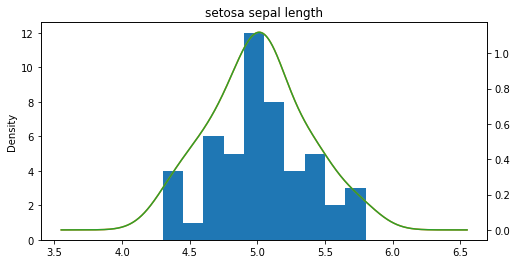

In [12]:
# Sepal Length 분포도 확인
ax = setosa_df['sepal length (cm)'].plot(kind='hist')
setosa_df['sepal length (cm)'].plot(kind='kde',
                                    ax=ax,
                                    secondary_y=True,
                                    title="setosa sepal length",
                                    figsize=(8, 4))

<AxesSubplot:label='a907fddc-3ca4-4034-928c-6aca5fe27ce8'>

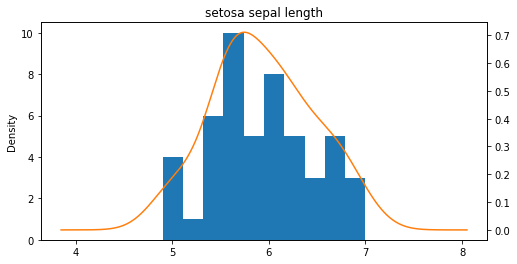

In [13]:
ax = versicolor_df['sepal length (cm)'].plot(kind='hist')
versicolor_df['sepal length (cm)'].plot(kind='kde',
                                        ax=ax,
                                        secondary_y=True,
                                        title="setosa sepal length",
                                        figsize=(8, 4))

<AxesSubplot:label='fe02e685-3790-4b96-b6f0-abd30088c43b'>

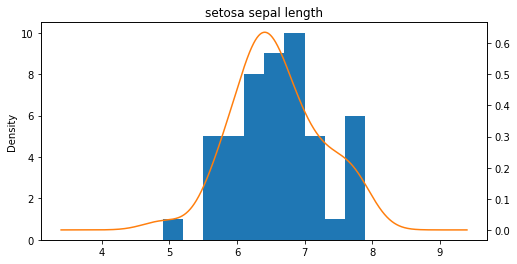

In [14]:
ax = virginica_df['sepal length (cm)'].plot(kind='hist')
virginica_df['sepal length (cm)'].plot(kind='kde',
                                        ax=ax,
                                        secondary_y=True,
                                        title="setosa sepal length",
                                        figsize=(8, 4))